In [12]:
from __future__ import print_function

import sys
sys.path.extend(['/home/jorg/repository/dcnn_acdc'])

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


import copy

import numpy as np
import torch

from common.hvsmr.config import config_hvsmr
from in_out.hvsmr.load_data import HVSMR2016DataSet
from plotting.color_maps import transparent_cmap

mycmap = transparent_cmap(plt.get_cmap('jet'))

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
dataset = HVSMR2016DataSet(config_hvsmr, search_mask=config_hvsmr.dflt_image_name + ".nii",
                               fold_id=0, preprocess="rescale",
                               debug=True)

  0%|          | 0/2 [00:00<?, ?it/s]

INFO - Using folds 0 - busy loading images/references...this may take a while!
INFO - Creating file list. Search for /home/jorg/repository/dcnn_acdc/data/HVSMR/Folds/fold0/train/images_quick/*patient*.nii 
INFO - Rescaling images intensity values


 50%|█████     | 1/2 [00:01<00:01,  1.31s/it]

INFO - Rescaling images intensity values


100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

INFO - Rescaling images intensity values
INFO - Using fold 0 - loaded 3 files: 5036 slices in train set, 182 slices in validation set


In [22]:
dataset.class_count

array([ 19273357.,   1381324.,   4150915.])

(173, 282) (173, 282)
(173, 282) (173, 282)
(173, 282) (173, 282)
(173, 282) (173, 282)
(173, 282) (173, 282)
(173, 282) (173, 282)
(173, 282) (173, 282)
(173, 282) (173, 282)
(173, 282) (173, 282)
(173, 282) (173, 282)


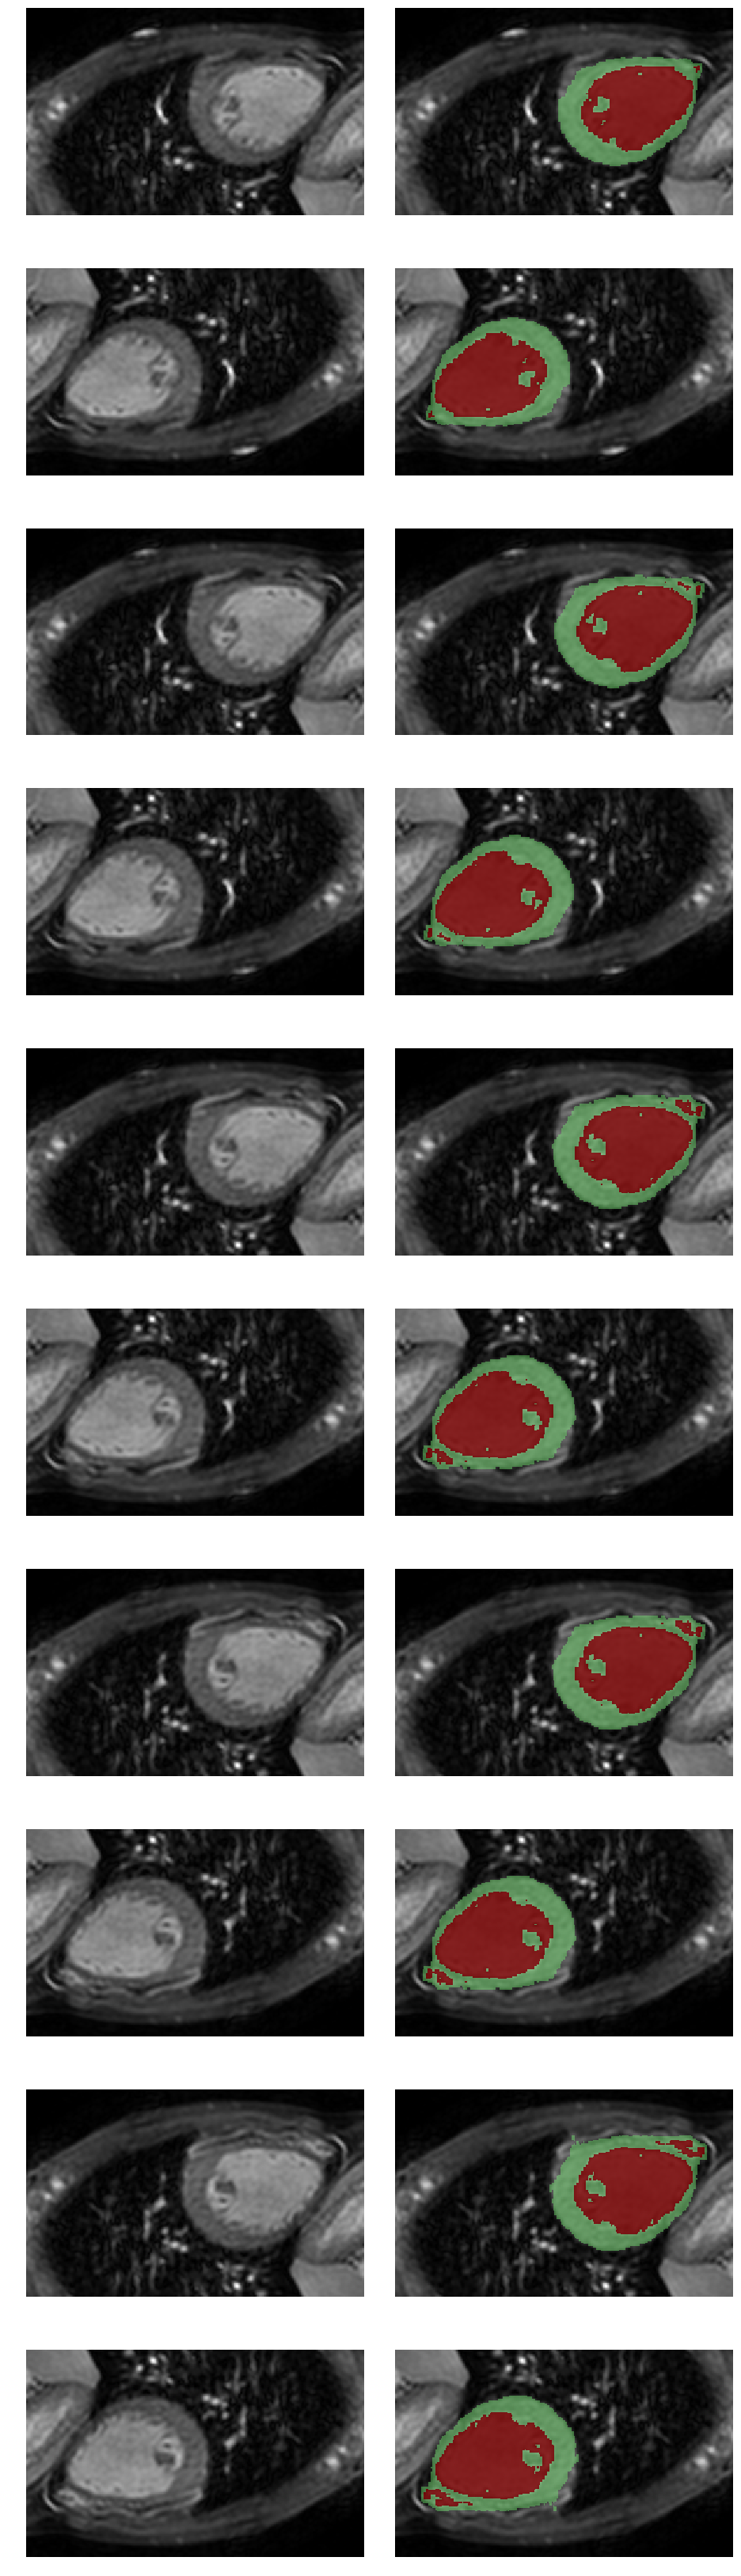

In [27]:
num_of_slices = dataset.get_num_of_slices(train=True)
batch_size = 10
batch_offset = 100
width = 16
height = batch_size * 6
columns = 4
rows = batch_size * 2
column = 0
row = 0
fig = plt.figure(figsize=(width, height))

for idx in np.arange(batch_offset, batch_offset + (2 * batch_size), 2):
    image = HVSMR2016DataSet.remove_padding(dataset.train_images[idx])
    
    reference = dataset.train_labels[idx]
    print(image.shape, reference.shape)
    ax1 = plt.subplot2grid((rows, columns), (row, 0), rowspan=2, colspan=2)
    ax1.imshow(image, cmap=cm.gray)
    plt.axis("off")
    ax2 = plt.subplot2grid((rows, columns), (row, 2), rowspan=2, colspan=2)
    ax2.imshow(image, cmap=cm.gray)
    ax2.imshow(reference, cmap=mycmap)
    plt.axis("off")
    row += 2